## 6.2 Exploring Relationships

1. Importing Visualization Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
matplotlib.__version__

'3.7.0'

In [3]:
%matplotlib inline

In [4]:
# Folder path 
path = r'/Users/crystalosuna/Documents/Gun Violence Analysis'

In [18]:
# Import data
df = pd.read_csv (os.path.join(path, 'Data', 'gun-violence-data-clean2.csv'), index_col = False)

2. Check Data

In [19]:
df.shape

(239677, 25)

In [20]:
df.columns

Index(['0', 'incident_id', 'date', 'state', 'city_or_county', 'Killed',
       'Injured', 'congressional_district', 'gun_type',
       'incident_characteristics', 'Gang Related', 'Mass shooting?',
       'number_guns_involved', 'participant_age', 'participant_age_group',
       'participant_gender', 'participant_status', 'participant_type',
       'state_house_district', 'state_senate_district', 'latitude',
       'longitude', 'year', 'month', 'loss'],
      dtype='object')

In [21]:
df.dtypes

0                             int64
incident_id                   int64
date                         object
state                        object
city_or_county               object
Killed                        int64
Injured                       int64
congressional_district        int64
gun_type                     object
incident_characteristics     object
Gang Related                 object
Mass shooting?               object
number_guns_involved         object
participant_age              object
participant_age_group        object
participant_gender           object
participant_status           object
participant_type             object
state_house_district         object
state_senate_district        object
latitude                    float64
longitude                   float64
year                          int64
month                         int64
loss                          int64
dtype: object

In [22]:
# rename columns
df = df.rename(columns={'Mass shooting?':'Mass Shooting','number_guns_involved':'n_guns_involved'})

In [23]:
df.head()

,0,incident_id,date,state,city_or_county,Killed,Injured,congressional_district,gun_type,incident_characteristics,...,participant_gender,participant_status,participant_type,state_house_district,state_senate_district,latitude,longitude,year,month,loss
0,0,461105,1/1/13,Pennsylvania,Mckeesport,0,4,14,0::Unkown,Shot - Wounded/Injured||Mass Shooting (4+ vict...,...,0::Male||1::Male||3::Male||4::Female,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,Unkown,Unkown,40.3467,-79.8559,2013,1,4
1,1,460726,1/1/13,California,Hawthorne,1,3,43,0::Unkown,"Shot - Wounded/Injured||Shot - Dead (murder, a...",...,0::Male,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,62,35,33.9090,-118.3330,2013,1,4
2,2,478855,1/1/13,Ohio,Lorain,1,3,9,0::Unknown||1::Unknown,"Shot - Wounded/Injured||Shot - Dead (murder, a...",...,0::Male||1::Male||2::Male||3::Male||4::Male,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,56,13,41.4455,-82.1377,2013,1,4
3,3,478925,1/5/13,Colorado,Aurora,4,0,6,0::Unkown,"Shot - Dead (murder, accidental, suicide)||Off...",...,0::Female||1::Male||2::Male||3::Male,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,40,28,39.6518,-104.8020,2013,1,4
4,4,478959,1/7/13,North Carolina,Greensboro,2,2,6,0::Handgun||1::Handgun,"Shot - Wounded/Injured||Shot - Dead (murder, a...",...,0::Female||1::Male||2::Male||3::Female,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,62,27,36.1140,-79.9569,2013,1,4


In [24]:
df.isnull().sum()

0                           0
incident_id                 0
date                        0
state                       0
city_or_county              0
Killed                      0
Injured                     0
congressional_district      0
gun_type                    0
incident_characteristics    0
Gang Related                0
Mass Shooting               0
n_guns_involved             0
participant_age             0
participant_age_group       0
participant_gender          0
participant_status          0
participant_type            0
state_house_district        0
state_senate_district       0
latitude                    0
longitude                   0
year                        0
month                       0
loss                        0
dtype: int64

3. Exploring relationships

In [25]:
#create Subset with only integers
df_sub = df[['Killed','Injured','congressional_district','year','month','loss','latitude','longitude']]

In [26]:
df_sub.head()

,Killed,Injured,congressional_district,year,month,loss,latitude,longitude
0,0,4,14,2013,1,4,40.3467,-79.8559
1,1,3,43,2013,1,4,33.9090,-118.3330
2,1,3,9,2013,1,4,41.4455,-82.1377
3,4,0,6,2013,1,4,39.6518,-104.8020
4,2,2,6,2013,1,4,36.1140,-79.9569


In [27]:
df_sub.corr()

,Killed,Injured,congressional_district,year,month,loss,latitude,longitude
Killed,1.000000,-0.125425,0.043575,0.003035,0.002522,0.510748,-0.093233,0.002991
Injured,-0.125425,1.000000,-0.005591,0.005972,0.017748,0.788881,-0.005535,0.022998
congressional_district,0.043575,-0.005591,1.000000,-0.043790,-0.024965,0.022147,-0.021267,-0.262361
year,0.003035,0.005972,-0.043790,1.000000,-0.166297,0.007055,-0.085601,0.078190
month,0.002522,0.017748,-0.024965,-0.166297,1.000000,0.016942,-0.055948,0.065167
loss,0.510748,0.788881,0.022147,0.007055,0.016942,1.000000,-0.062549,0.021782
latitude,-0.093233,-0.005535,-0.021267,-0.085601,-0.055948,-0.062549,1.000000,-0.621481
longitude,0.002991,0.022998,-0.262361,0.078190,0.065167,0.021782,-0.621481,1.000000


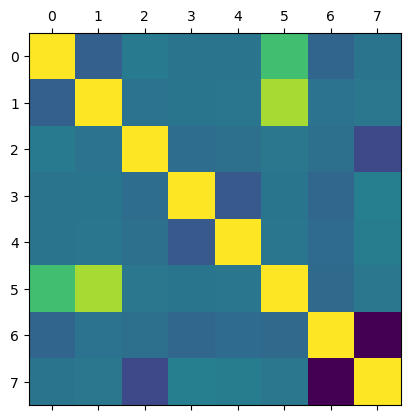

In [28]:
# Create a correlation heatmap using matplotlib

plt.matshow(df_sub.corr())
plt.show()

In [29]:
#current dir
cwd = os.getcwd()
cwd

'/Users/crystalosuna/Documents/Gun Violence Analysis/Scripts'

Text(0.5, 1.0, 'Correlation Matrix')

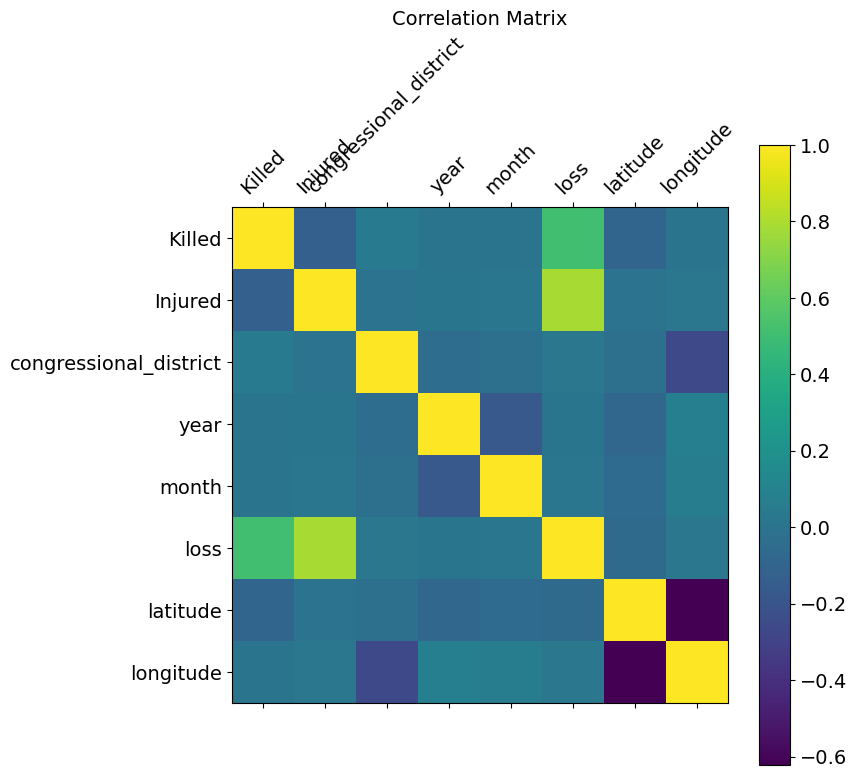

In [30]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df_sub.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_sub.shape[1]), df_sub.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df_sub.shape[1]), df_sub.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

Correlation Heatmap

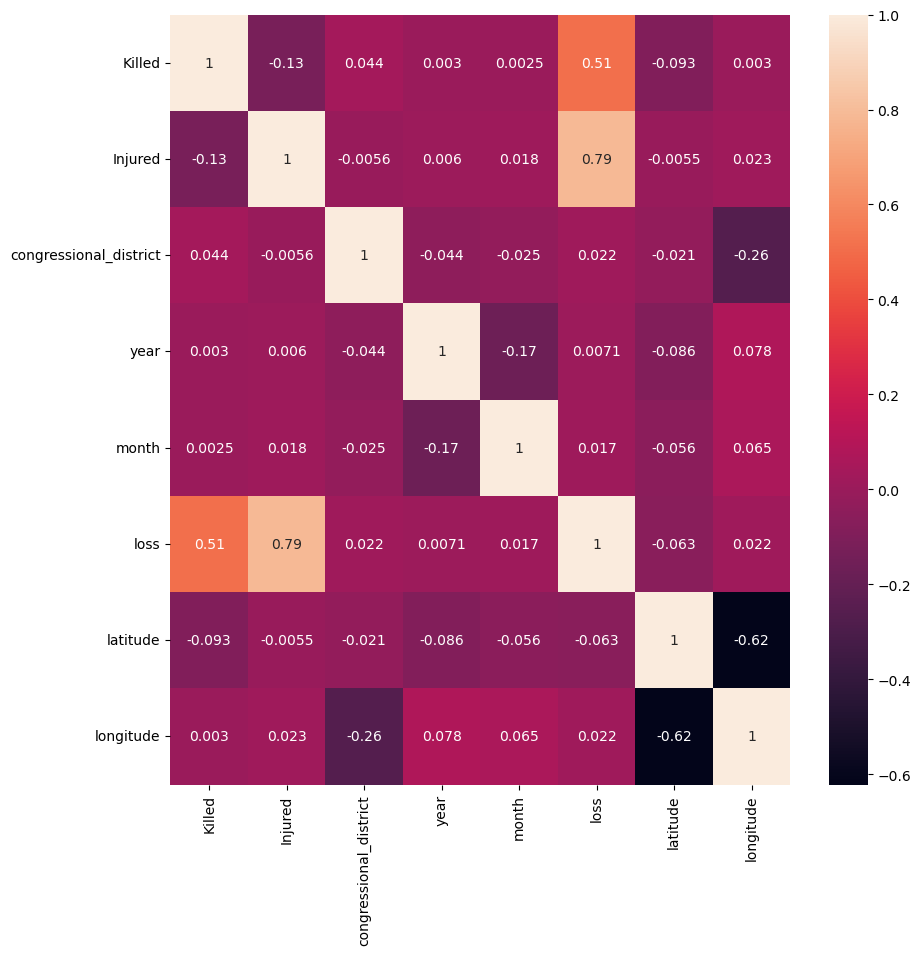

In [31]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

4. Scatterplots

In [32]:
df_sub.columns

Index(['Killed', 'Injured', 'congressional_district', 'year', 'month', 'loss',
       'latitude', 'longitude'],
      dtype='object')

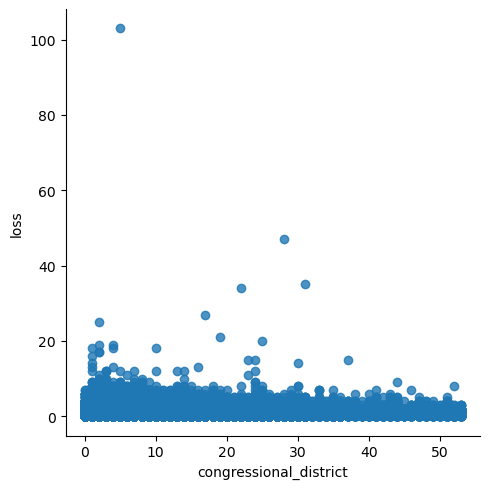

In [33]:
#create a scatterplot for the 'congressional_district' and 'loss' columns in seaborn

sns.lmplot(x = 'congressional_district', y = 'loss', data = df_sub)
# depending on the congressinal districts there each will be more or less injured and killed due to gun violence

5. Create Pair Plots

In [35]:
#Create Subset of only variables wanted for pair plots
df_sub2= df_sub[['loss','congressional_district','Killed','Injured','month']]

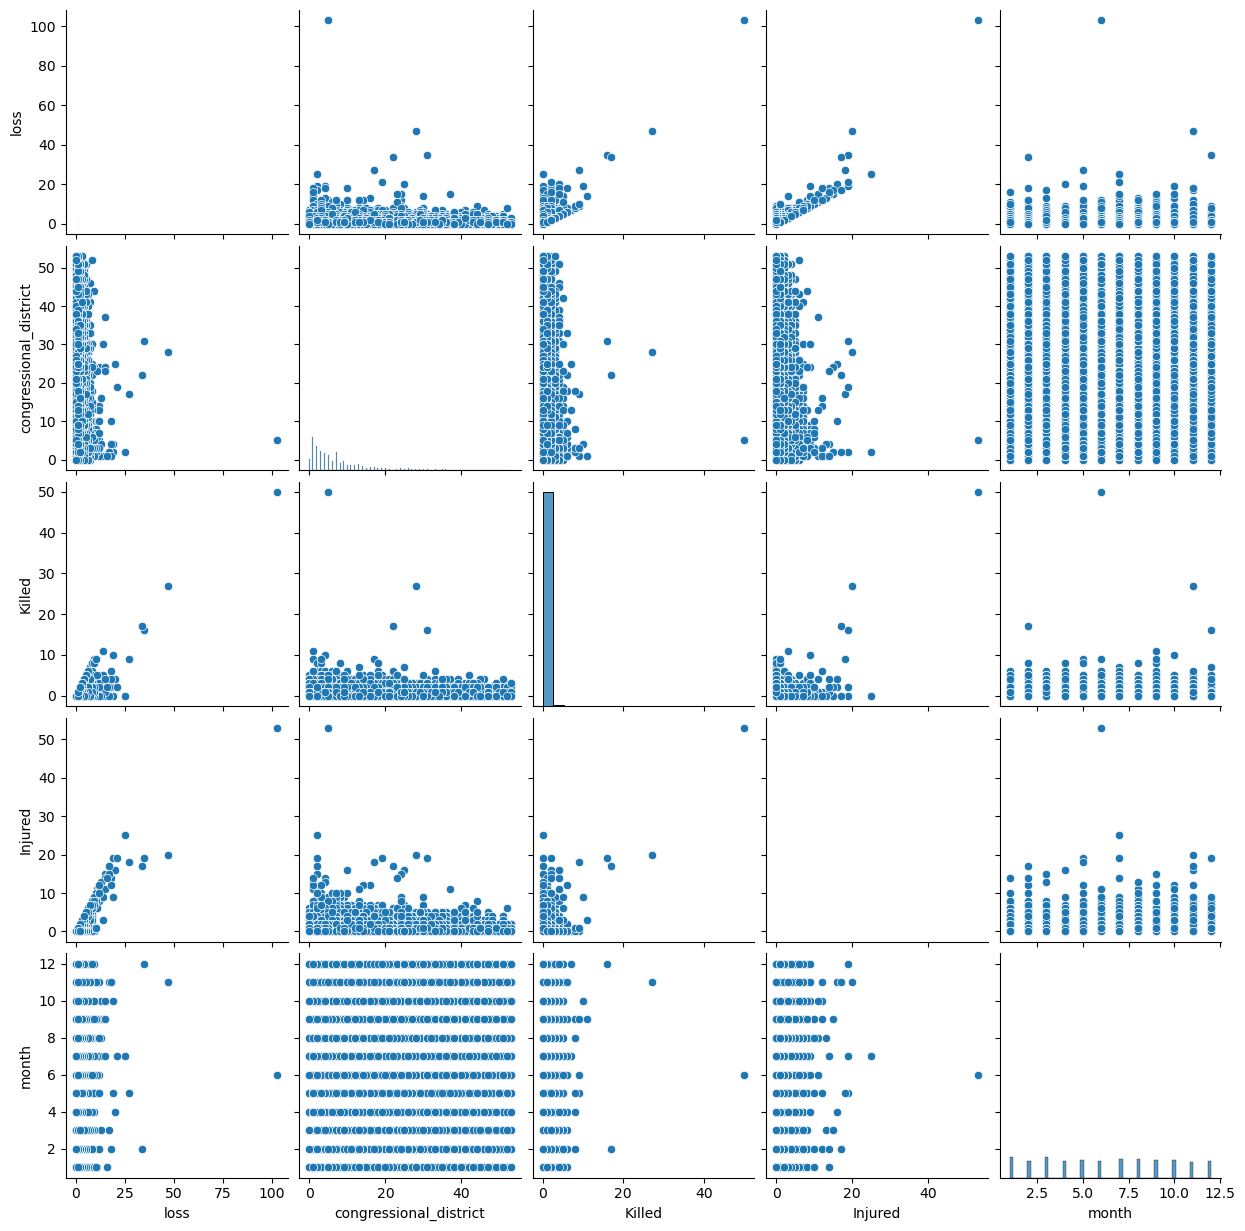

In [36]:
# Create a pair plot of df_sub2
g = sns.pairplot(df_sub2)

There doesn't seem to be correlations between these variables. Only the 'injured' and 'loss' and 'killed' and'loss'.

6. Explore Categorial Variables

In [37]:
df.columns

Index(['0', 'incident_id', 'date', 'state', 'city_or_county', 'Killed',
       'Injured', 'congressional_district', 'gun_type',
       'incident_characteristics', 'Gang Related', 'Mass Shooting',
       'n_guns_involved', 'participant_age', 'participant_age_group',
       'participant_gender', 'participant_status', 'participant_type',
       'state_house_district', 'state_senate_district', 'latitude',
       'longitude', 'year', 'month', 'loss'],
      dtype='object')

<Axes: xlabel='loss', ylabel='Count'>

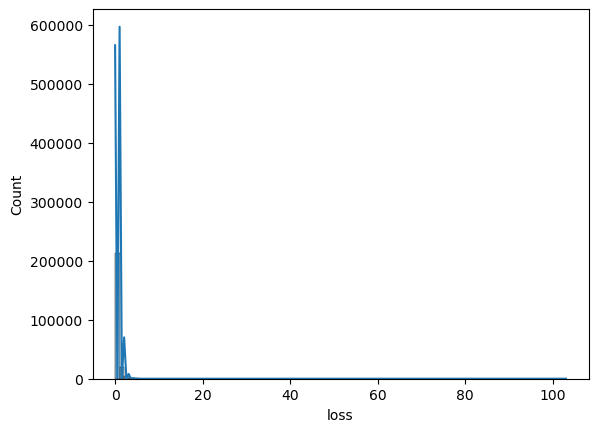

In [43]:
# Use a histogram to visualize the distribution of 'loss'. 

sns.histplot(df['loss'], bins = 100, kde = True)

In [44]:
df_sub2.describe()

,loss,congressional_district,Killed,Injured,month
count,239677.000000,239677.000000,239677.000000,239677.000000,239677.000000
mean,0.746296,7.602532,0.252290,0.494007,6.351786
std,0.842343,8.448175,0.521779,0.729952,3.447656
min,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,2.000000,0.000000,0.000000,3.000000
50%,1.000000,5.000000,0.000000,0.000000,6.000000
75%,1.000000,10.000000,0.000000,1.000000,9.000000
max,103.000000,53.000000,50.000000,53.000000,12.000000


<Axes: xlabel='state', ylabel='Count'>

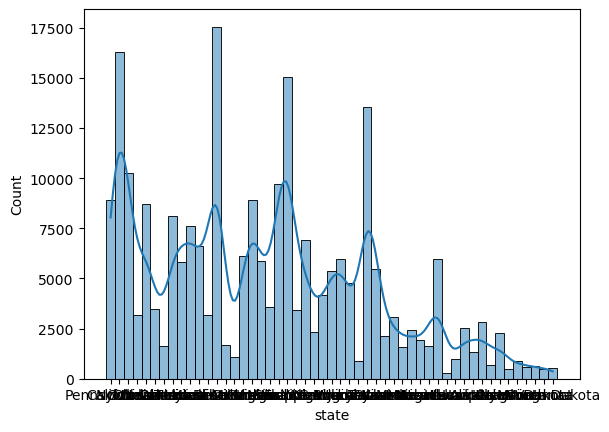

In [47]:
# Use a histogram to visualize the distribution of 'state'. 

sns.histplot(df['state'], bins = 150, kde = True)

<Axes: xlabel='month', ylabel='Count'>

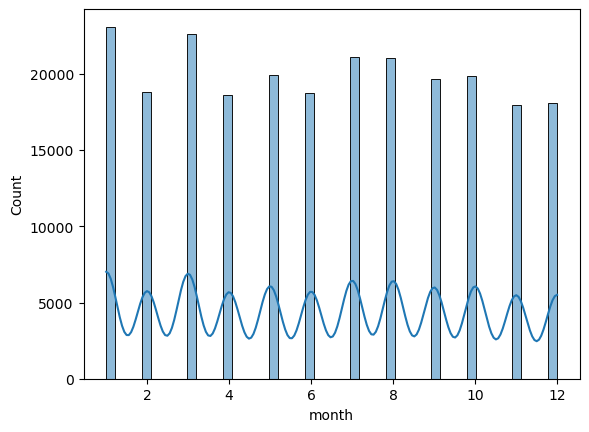

In [50]:
# Use a histogram to visualize the distribution of 'month'. 

sns.histplot(df['month'], bins = 50, kde = True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 [Text(0, 0, 'New Hampshire'),
  Text(1, 0, 'Wyoming'),
  Text(2, 0, 'Maine'),
  Text(3, 0, 'Vermont'),
  Text(4, 0, 'North Dakota'),
  Text(5, 0, 'Massachusetts'),
  Text(6, 0, 'South Dakota'),
  Text(7, 0, 'Iowa'),
  Text(8, 0, 'Alaska'),
  Text(9, 0, 'Montana'),
  Text(10, 0, 'Rhode Island'),
  Text(11, 0, 'Idaho'),
  Text(12, 0, 'Oregon'),
  Text(13, 0, 'Hawaii'),
  Text(14, 0, 'Connecticut'),
  Text(15, 0, 'Nebraska'),
  Text(16, 0, 'Minnesota'),
  Text(17, 0, 'District of Columbia'),
  Text(18, 0, 'Colorado'),
  Text(19, 0, 'Wisconsin'),
  Text(20, 0, 'Washington'),
  Text(21, 0, 'West Virginia'),
  Text(22, 0, 'New Mexico'),
  Text(23, 0, 'Delaware'),
  Text(24, 0, 'Utah'),
  Text(25, 0, 'South Carolina'),
  Text(26, 0, 'Kansas'),
  Text(27, 0, 'New Jer

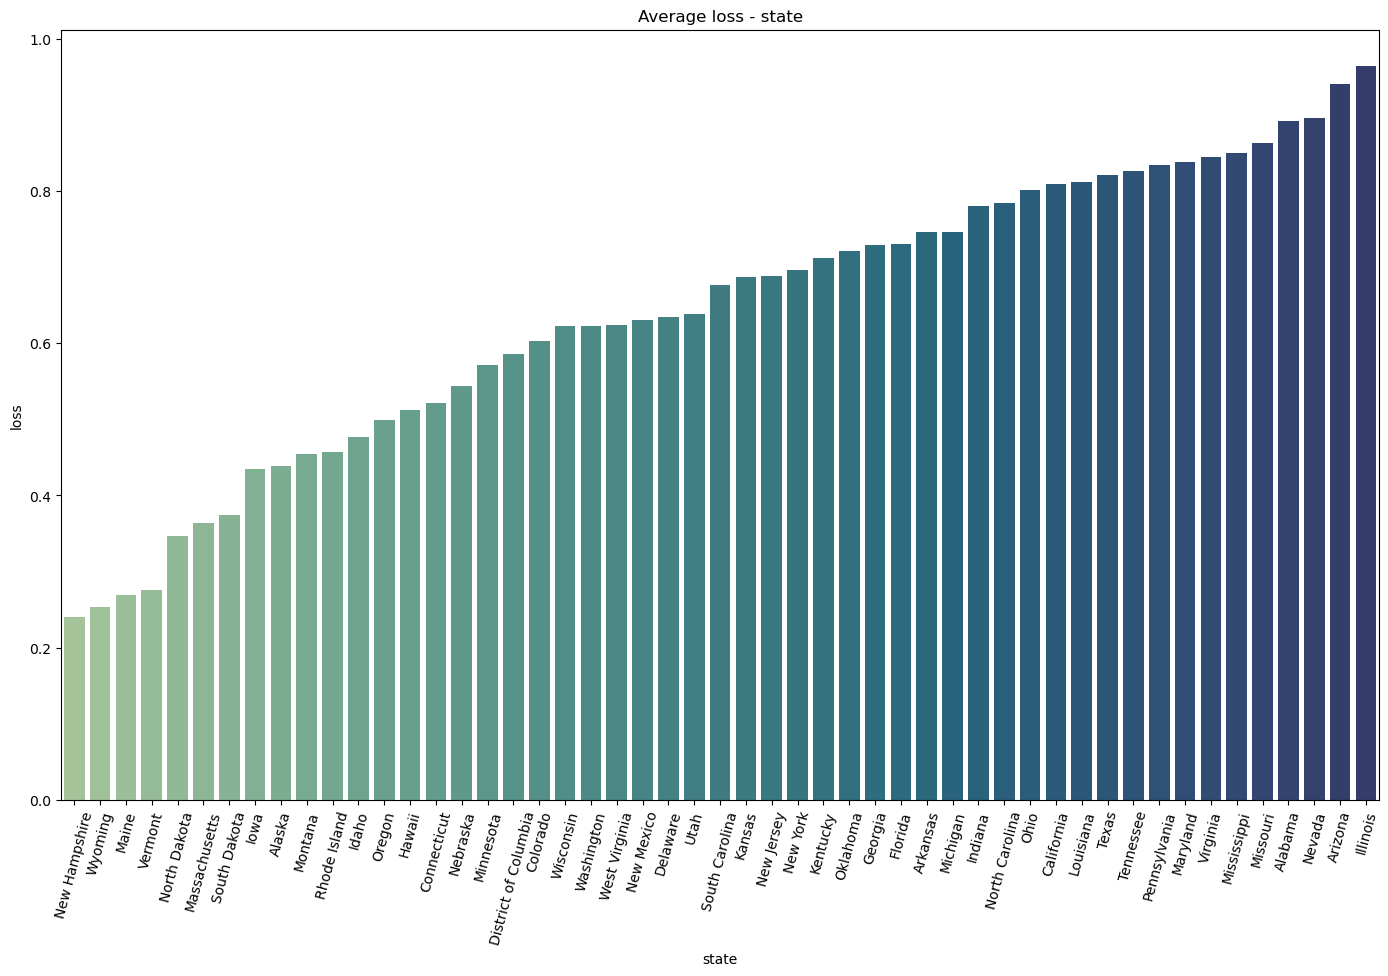

In [51]:
# Injured or killed by State

# 1. set figure size
fig = plt.figure(figsize=(17,10) )

# 2. group by state and the mean value in loss
mat_viewed = df.groupby('state')['loss'].mean().sort_values().reset_index(drop = False)

# 3. Plot the graph
sns.barplot(x ='state', y = 'loss', data = mat_viewed,
                 palette = 'crest')
plt.title("Average loss - state")
plt.xticks(rotation = 75)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12')])

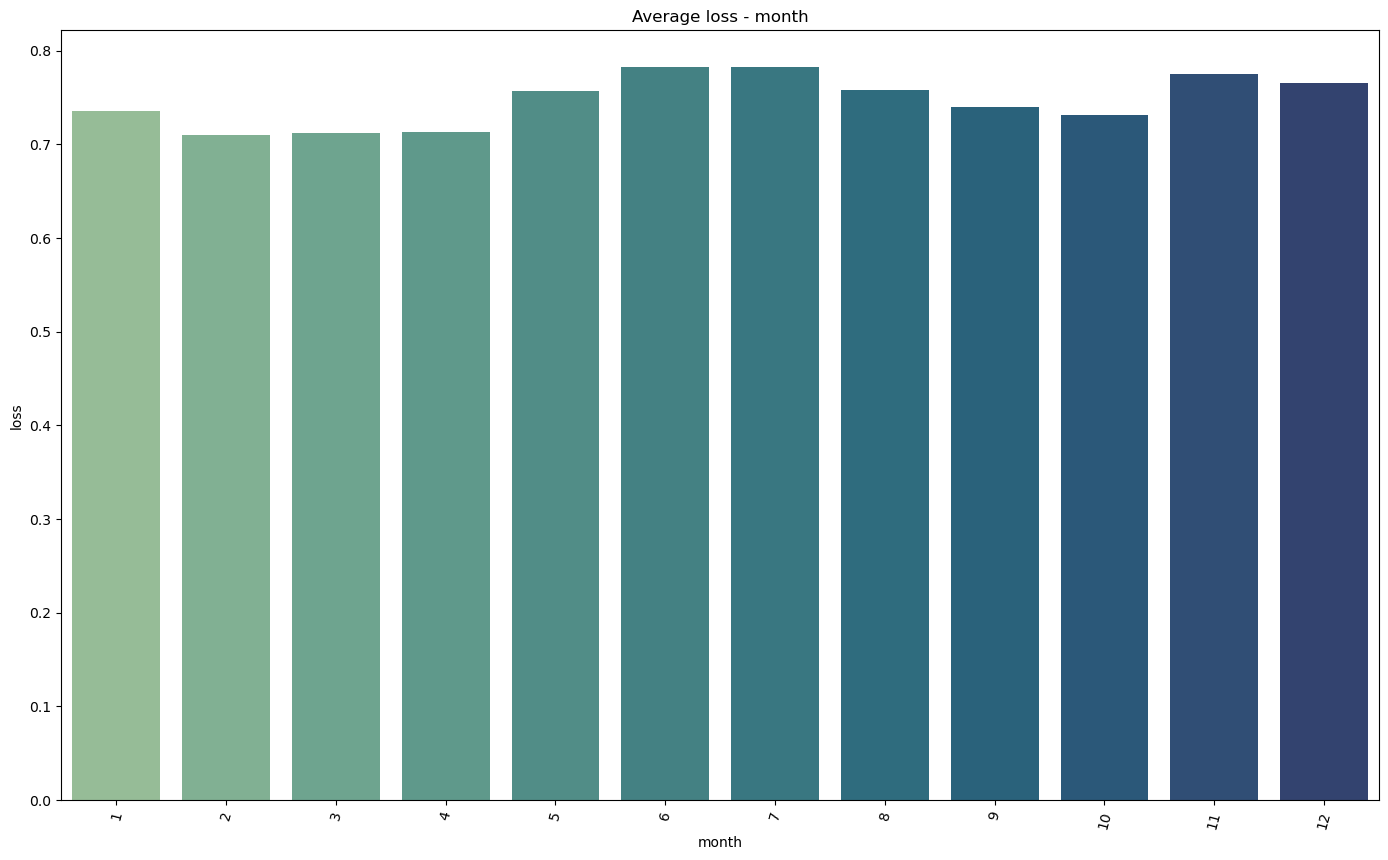

In [52]:
# Injured or killed by month

# 1. set figure size
fig = plt.figure(figsize=(17,10) )

# 2. group by state and the mean value in loss
mat_viewed = df.groupby('month')['loss'].mean().sort_values().reset_index(drop = False)

# 3. Plot the graph
sns.barplot(x ='month', y = 'loss', data = mat_viewed,
                 palette = 'crest')
plt.title("Average loss - month")
plt.xticks(rotation = 75)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '2013'),
  Text(1, 0, '2014'),
  Text(2, 0, '2015'),
  Text(3, 0, '2016'),
  Text(4, 0, '2017'),
  Text(5, 0, '2018')])

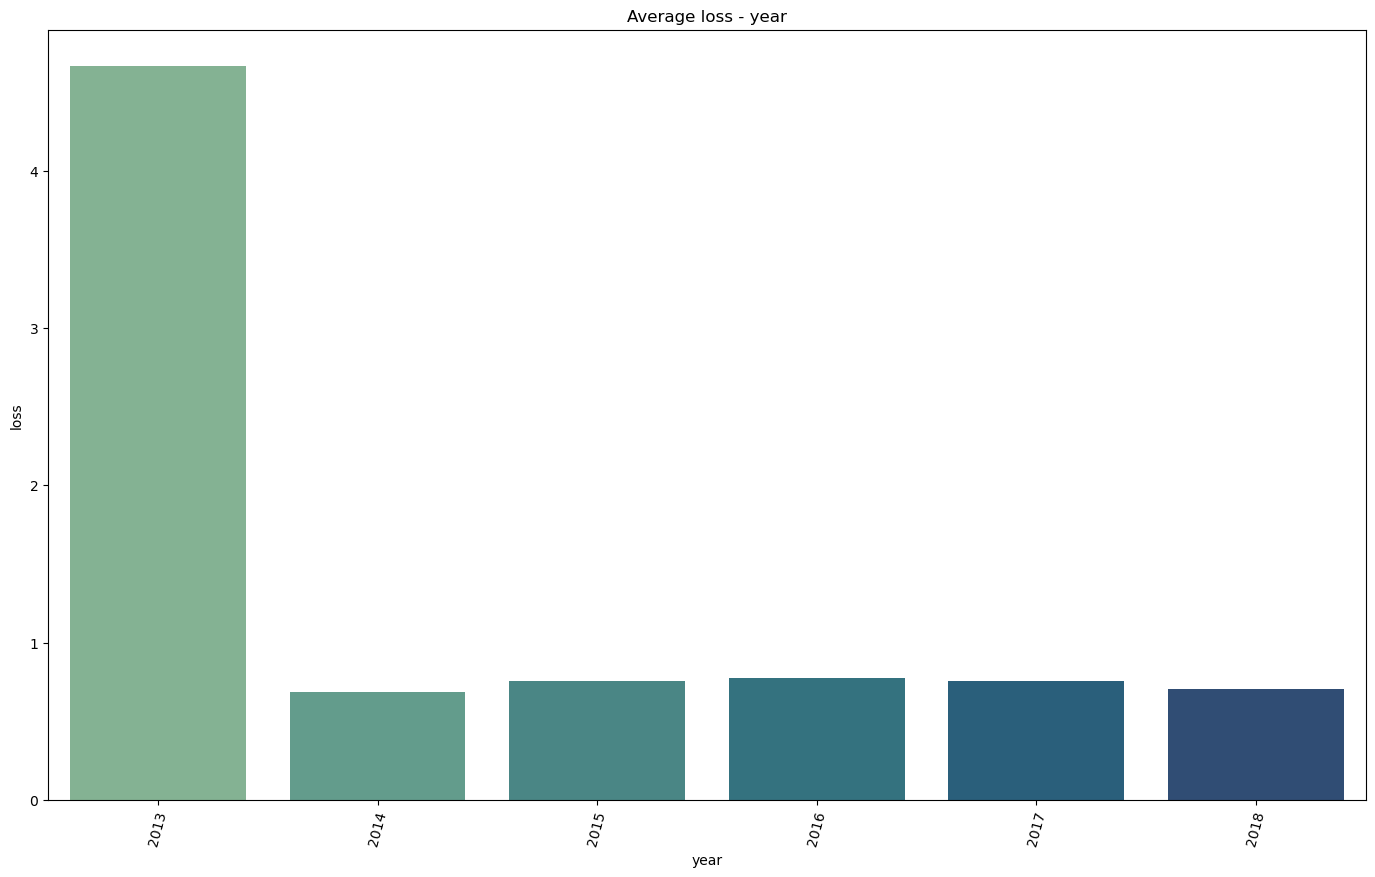

In [53]:
# Injured or killed by year

# 1. set figure size
fig = plt.figure(figsize=(17,10) )

# 2. group by state and the mean value in loss
mat_viewed = df.groupby('year')['loss'].mean().sort_values().reset_index(drop = False)

# 3. Plot the graph
sns.barplot(x ='year', y = 'loss', data = mat_viewed,
                 palette = 'crest')
plt.title("Average loss - year")
plt.xticks(rotation = 75)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 [Text(0, 0, 'Montana'),
  Text(1, 0, 'South Dakota'),
  Text(2, 0, 'District of Columbia'),
  Text(3, 0, 'Delaware'),
  Text(4, 0, 'Alaska'),
  Text(5, 0, 'North Dakota'),
  Text(6, 0, 'Vermont'),
  Text(7, 0, 'Wyoming'),
  Text(8, 0, 'New Hampshire'),
  Text(9, 0, 'Rhode Island'),
  Text(10, 0, 'Idaho'),
  Text(11, 0, 'Nebraska'),
  Text(12, 0, 'Maine'),
  Text(13, 0, 'Hawaii'),
  Text(14, 0, 'New Mexico'),
  Text(15, 0, 'Iowa'),
  Text(16, 0, 'West Virginia'),
  Text(17, 0, 'Arkansas'),
  Text(18, 0, 'Nevada'),
  Text(19, 0, 'Utah'),
  Text(20, 0, 'Mississippi'),
  Text(21, 0, 'Oklahoma'),
  Text(22, 0, 'Louisiana'),
  Text(23, 0, 'Kansas'),
  Text(24, 0, 'Connecticut'),
  Text(25, 0, 'Oregon'),
  Text(26, 0, 'Missouri'),
  Text(27, 0, 'Minnesota'),
  Text(

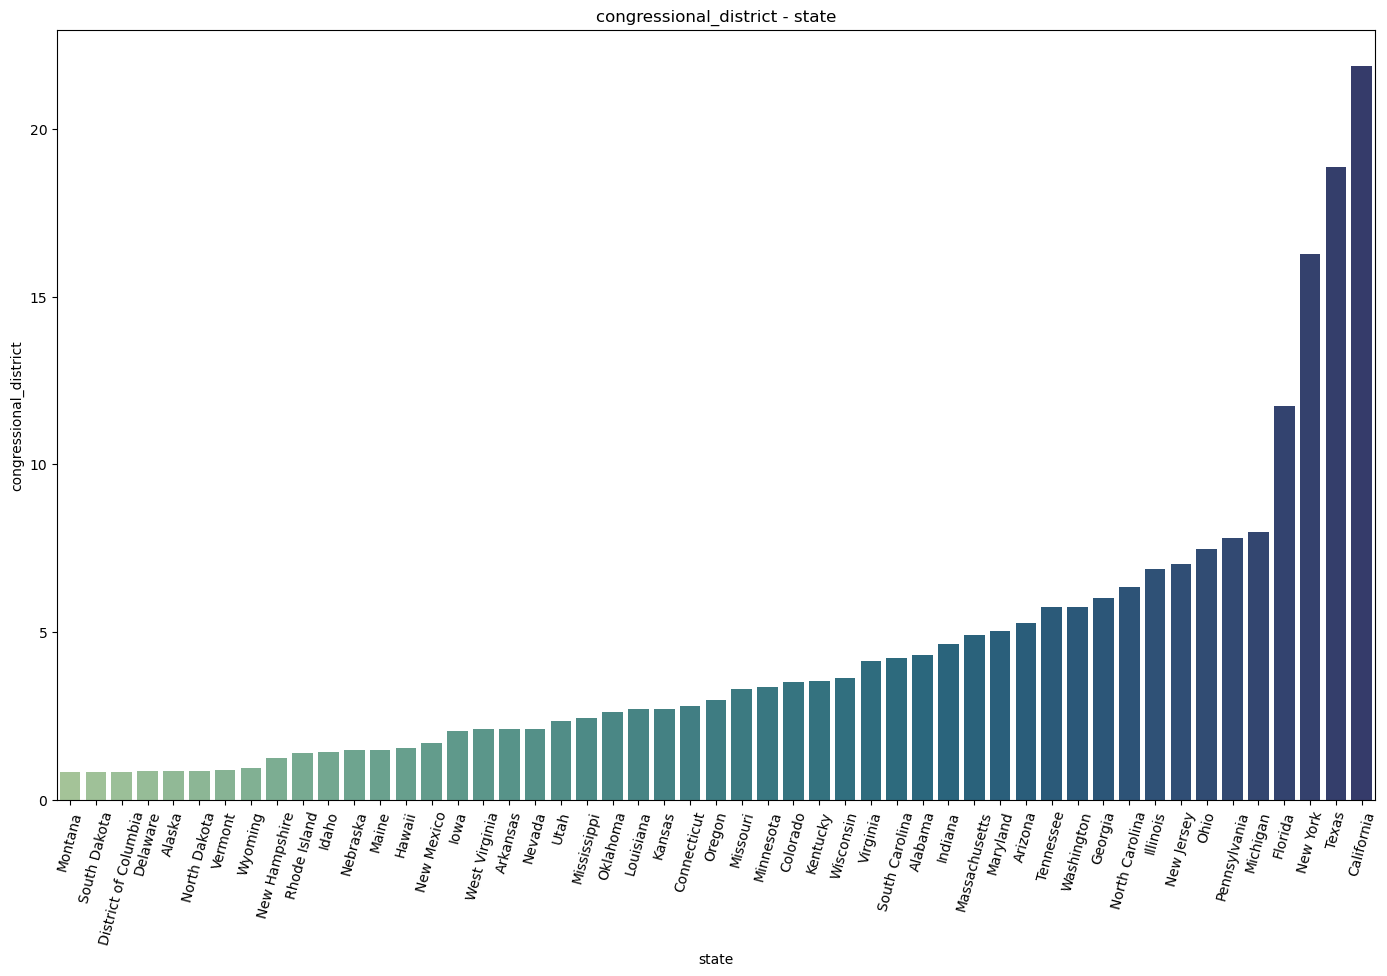

In [58]:
# Congressional Districts by State

# 1. set figure size
fig = plt.figure(figsize=(17,10) )

# 2. group by state and the mean value in loss
mat_viewed = df.groupby('state')['congressional_district'].mean().sort_values().reset_index(drop = False)

# 3. Plot the graph
sns.barplot(x ='state', y = 'congressional_district', data = mat_viewed,
                 palette = 'crest')
plt.title("congressional_district - state")
plt.xticks(rotation = 75)

Based on the categorical plots I can see Illinois having the highest number of injured or killed by gun related accidents. 

The data is skewed to 2013 for total loss. Which makes me question if there is any bias involved. 

There is not a specific month gun related shootings occur.

Hypothesis
1. Each state that has more than 25 congressional districts has had more gun related shootings than states that have less than 25.

2. Towards the middle of the year and end of the year there are more gun related accidents.
